In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52493 entries, 0 to 52492
Columns: 785 entries, label to pixel784
dtypes: float64(732), int64(53)
memory usage: 314.4 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
x_train = train.drop("label",axis = 1)
y_train = train['label']
x_test = test.drop("label",axis = 1)
y_test = test['label']

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


In [ ]:
x_train_reshape = x_train.values.reshape(-1,28,28,1)
x_test_reshape = x_test.values.reshape(-1,28,28,1)


In [ ]:
labels = ['t-shirts','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','boots']

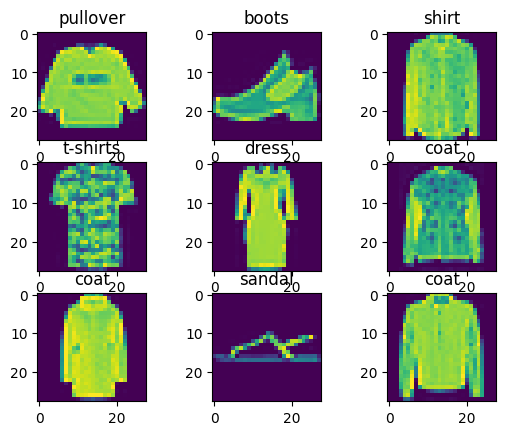

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_reshape[i])
  plt.title(labels[y_train[i]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train_reshape,y_train,epochs = 5)

Epoch 1/5
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 65s 39ms/step - accuracy: 0.6777 - loss: nan
Epoch 2/5
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.1006 - loss: nan
Epoch 3/5
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.1000 - loss: nan
Epoch 4/5
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.1021 - loss: nan
Epoch 5/5
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.1013 - loss: nan


In [ ]:
model.evaluate(x_test_reshape,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0981 - loss: nan


[nan, 0.10000000149011612]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
t-shirts


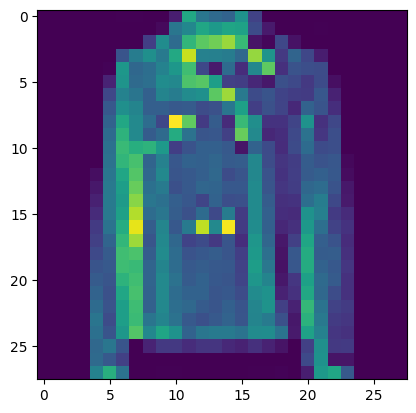

In [ ]:
predictions = model.predict(x_test_reshape[11:12])
label = labels[np.argmax(predictions)]
print(label)
plt.imshow(x_test_reshape[11:12][0])
